<h1><center>HW 3: Build Twitter Networks</center></h1>

### Q1. Scrape the follower-followee network by companies.
    * Define a function to retrieve the follower-followee network of a list of twenty accounts of U.S. FT companies. 
    * The input will be a list of Twitter screen names. 
    * The output will be a dataframe with this list of accounts as row index and column index, and 1 and 0 as values.
    * Note: this will take some time because Twitter API will force you to sleep. 


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import re
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import tweepy
import datetime
import time
from collections import Counter

In [7]:
CONSUMER_KEY='c5vuI4xawiuos3BKW9UXZ8FFY'
CONSUMER_SECRET='7kNtpN1gSIYEOygD2fnZNNpkZRfoVRX1ib8UZrHFGyzAkulobw'
ACCESS_KEY='1453412544996073473-zPPYVT0f1z6e0xKAs3vCzx1wWpedNd'
ACCESS_SECRET='NmdQ2B5xtvJLOJgmW0b69ebquTLzCwAguGxsG6HRRp9Y2'

auth=tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY,ACCESS_SECRET)
api=tweepy.API(auth)

# define your function here
def get_follow(accounts):
    releation2 = []
    releation3 = []
    for i in accounts:
        time.sleep(10)
        for k in accounts:
            is_following = api.get_friendship(source_screen_name=i, target_screen_name=k)
            releation = is_following[1].following
            if len(releation2) == 15:
                releation2 = []
            releation2 += [releation]
        releation3.append(releation2)
    relationship = pd.array(releation3)
    relationship = pd.DataFrame(relationship)
    relationship.index = accounts
    relationship.columns = accounts
    
    return relationship


In [15]:
# test the function with the list of accounts
accounts=['walmart',
 'tysonfoods',
 'republicservice',
 'onsemi',
 'amkortechnology',
 'cbre',
 'smartfinal',
 'google',
 'ebay',
 'intuit',
 'intel',
 'paypal',
 'oracle',
 'netflix',
  'target']

get_follow(accounts)

,walmart,tysonfoods,republicservice,onsemi,amkortechnology,cbre,smartfinal,google,ebay,intuit,intel,paypal,oracle,netflix,target
walmart,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
tysonfoods,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
republicservice,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
onsemi,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
amkortechnology,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
cbre,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
smartfinal,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
google,False,True,True,False,False,True,False,False,True,True,True,False,False,False,True
ebay,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
intuit,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


### Q2. Build a directed network with the data you just scraped.
    * Bulid a network and visualize it. Hint: you can use "nx.convert_matrix.from_pandas_adjacency".
    * Calculate the indegree centrality and structural hole (you can use constraint). 
    * Sort these nodes by indegree centrality and print the top one account.
    * Sort these nodes by structural hole and print the top one account. 
    * Note the NA values in constraint measures. Also note the relation between structural hole and constraint.

,walmart,tysonfoods,republicservice,onsemi,amkortechnology,cbre,smartfinal,google,ebay,intuit,intel,paypal,oracle,netflix,target
walmart,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
tysonfoods,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
republicservice,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
onsemi,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
amkortechnology,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
cbre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
smartfinal,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
google,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1
ebay,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
intuit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


True

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'The follower-followee network of Fortune companies')

(-1.200977838038745,
 1.2091426904923694,
 -0.9296388652086345,
 1.1352392410224157)

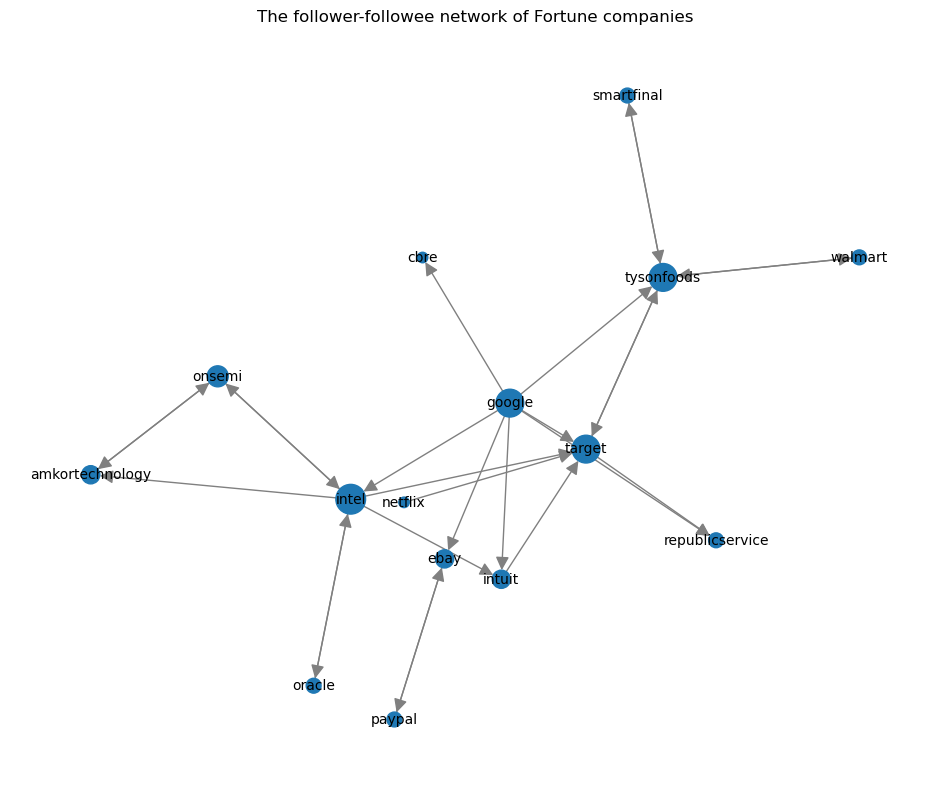

In [4]:
# add your code here
for i in relationship.columns:
    if relationship[i].dtype==bool:
        relationship[i]=relationship[i].astype('int')
relationship
# Build a network from the adjacency matrix
G = nx.convert_matrix.from_pandas_adjacency(relationship.astype(int), create_using = nx.DiGraph())
nx.is_directed(G)


figure(figsize=(12, 10), dpi=100)
node_size= [x * 800 for x in nx.degree_centrality(G).values()]
pos=nx.kamada_kawai_layout(G)
arrowsize=20
edge_color="grey"
nx.drawing.nx_pylab.draw_networkx(G, node_size=node_size, 
                                  pos=pos,
                                  arrowsize=arrowsize,
                                  edge_color=edge_color,
                                  with_labels=True,
                                  font_size=10)
plt.title('The follower-followee network of Fortune companies')
plt.axis("off") 
plt.show()

In [7]:
constraint = dict([x for x in nx.constraint(G).items()])
constraint.pop('republicservice')
constraint.pop('cbre')
print(constraint)
centrality = dict([x for x in nx.in_degree_centrality(G).items()])

nan

nan

{'walmart': 1.0, 'tysonfoods': 0.29071220324864633, 'onsemi': 0.7608506944444444, 'amkortechnology': 1.0069444444444444, 'smartfinal': 1.0, 'google': 0.28125578462677586, 'ebay': 0.5555555555555556, 'intuit': 0.5408871882086166, 'intel': 0.33003826530612246, 'paypal': 1.0, 'oracle': 1.0, 'netflix': 1.0, 'target': 0.320822631773798}


In [8]:
#calculate centrality and constraint
print(centrality)
#constraint
print(constraint)

#sort
print(dict(sorted(centrality.items(), key=lambda item:item[1],reverse=True)))
sorted(centrality.items(), key=lambda item:item[1],reverse=True)[0][0]

print(dict(sorted(constraint.items(), key=lambda item:item[1])))
sorted(constraint.items(), key=lambda item:item[1])[0][0]

{'walmart': 0.07142857142857142, 'tysonfoods': 0.2857142857142857, 'republicservice': 0.14285714285714285, 'onsemi': 0.14285714285714285, 'amkortechnology': 0.14285714285714285, 'cbre': 0.07142857142857142, 'smartfinal': 0.07142857142857142, 'google': 0.0, 'ebay': 0.14285714285714285, 'intuit': 0.14285714285714285, 'intel': 0.21428571428571427, 'paypal': 0.07142857142857142, 'oracle': 0.07142857142857142, 'netflix': 0.0, 'target': 0.3571428571428571}
{'walmart': 1.0, 'tysonfoods': 0.29071220324864633, 'onsemi': 0.7608506944444444, 'amkortechnology': 1.0069444444444444, 'smartfinal': 1.0, 'google': 0.28125578462677586, 'ebay': 0.5555555555555556, 'intuit': 0.5408871882086166, 'intel': 0.33003826530612246, 'paypal': 1.0, 'oracle': 1.0, 'netflix': 1.0, 'target': 0.320822631773798}
{'target': 0.3571428571428571, 'tysonfoods': 0.2857142857142857, 'intel': 0.21428571428571427, 'republicservice': 0.14285714285714285, 'onsemi': 0.14285714285714285, 'amkortechnology': 0.14285714285714285, 'ebay

'target'

{'google': 0.28125578462677586, 'tysonfoods': 0.29071220324864633, 'target': 0.320822631773798, 'intel': 0.33003826530612246, 'intuit': 0.5408871882086166, 'ebay': 0.5555555555555556, 'onsemi': 0.7608506944444444, 'walmart': 1.0, 'smartfinal': 1.0, 'paypal': 1.0, 'oracle': 1.0, 'netflix': 1.0, 'amkortechnology': 1.0069444444444444}


'google'